# Startup Profit Prediction System

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('50_Startups.csv')

In [4]:
df.head(3)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


### EDA

array([[<AxesSubplot:title={'center':'R&D Spend'}>,
        <AxesSubplot:title={'center':'Administration'}>],
       [<AxesSubplot:title={'center':'Marketing Spend'}>,
        <AxesSubplot:title={'center':'Profit'}>]], dtype=object)

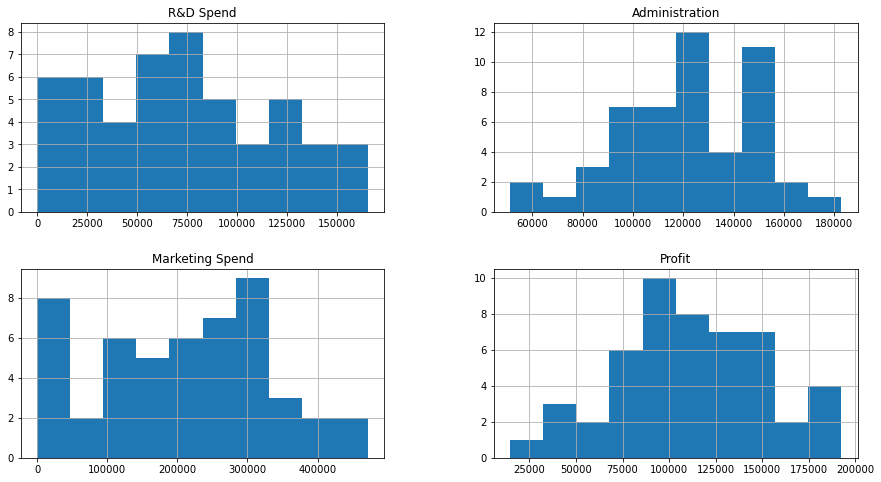

In [7]:
df.drop('State',axis=1).hist(figsize=(15,8))

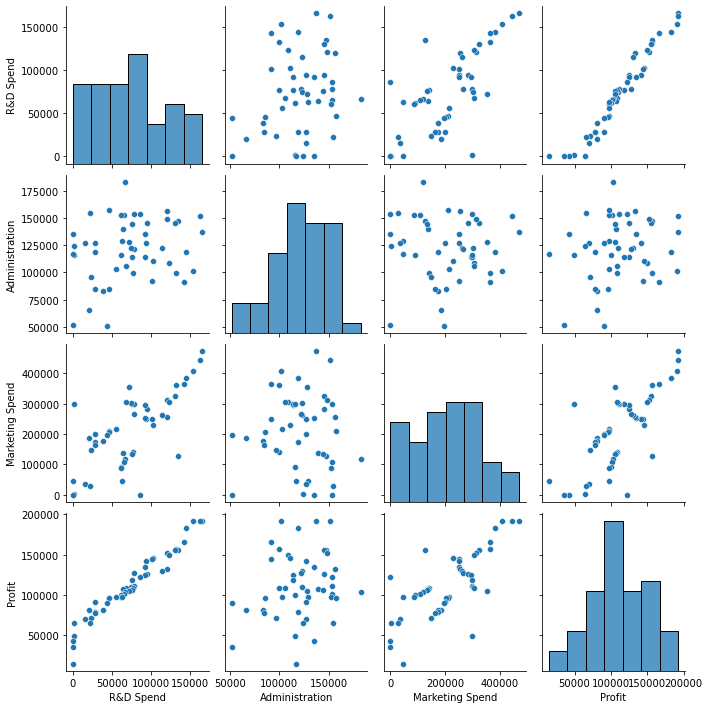

In [8]:
sns.pairplot(df)

In [9]:
# Deal with the categorical data

pd.get_dummies(df['State'])
df=pd.concat([df,df['State'].str.get_dummies()],axis=1)

In [10]:
df.drop('State',axis=1,inplace=True)

### Modelling

In [11]:
X=df.drop('Profit',axis=1)
y=df['Profit']

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [13]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.20,random_state=101)

In [14]:
xtest


,R&D Spend,Administration,Marketing Spend,California,Florida,New York
37,44069.95,51283.14,197029.42,1,0,0
14,119943.24,156547.42,256512.92,0,1,0
21,78389.47,153773.43,299737.29,0,0,1
32,63408.86,129219.61,46085.25,1,0,0
22,73994.56,122782.75,303319.26,0,1,0
1,162597.70,151377.59,443898.53,1,0,0
26,75328.87,144135.98,134050.07,0,1,0
46,1315.46,115816.21,297114.46,0,1,0
42,23640.93,96189.63,148001.11,1,0,0
47,0.00,135426.92,0.00,1,0,0


In [15]:
model = LinearRegression().fit(xtrain,ytrain)

In [16]:
model.score(xtest,ytest)

0.949397330377654

In [17]:
# model_log = LogisticRegression().fit(xtrain,ytrain)

### Evaluation

In [18]:
from sklearn.metrics import mean_absolute_error as mae


In [19]:
ypred = model.predict(xtest)

In [20]:
df_mae = mae(ypred,ytest)
df_mae

7068.317931595273

### Deployment

In [21]:
final_model = model

In [22]:
pd.to_pickle(final_model,'StartUp_Profit')

In [23]:
final_model.score(xtest,ytest)

0.949397330377654

In [24]:
100* final_model.score(xtest,ytest)

94.9397330377654